In [31]:
# Imports
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [32]:
# Read data from CSV and remove unnecessary columns
df = pd.read_csv('../data/CNA15-PopPerYearByAgeGroup.csv')
df.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)
df.head()

# We will need separate models for each age group
age_groups = np.array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years', '85 years and over'])

# 80/20 train test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [33]:
# Storing models for each age group
models = {}

# To be used in evaluation
forecasts = []
r_squareds = []
rmses = []

# Fit each model with a corresponding age group and record results
for ag in age_groups:
    y = train[ag]
    
    model = pm.auto_arima(y, seasonal=False, stepwise=True, trace=True)
    models[ag] = model
    
    forecast = model.predict(n_periods=len(test[ag]))
    
    forecasts.append(forecast)
    rmses.append(root_mean_squared_error(test[ag], forecast))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=300.848, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=296.386, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=254.053, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=255.988, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=255.941, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=296.283, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=254.157, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=250.112, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=247.723, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=251.023, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=248.499, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 se

In [37]:
for forecast, ag, rmse in zip(forecasts, age_groups, rmses):
    print(f'{ag} forecast:\n{forecast}')
    print(f'RMSE: {rmse}\n')

Under 1 year forecast:
12    55179.727592
13    62105.487917
14    62105.487917
15    62105.487917
dtype: float64
RMSE: 5189.632949627819

1 - 4 years forecast:
12    230154.292065
13    246350.106774
14    246350.106774
15    246350.106774
dtype: float64
RMSE: 22429.28511266986

5 - 9 years forecast:
12    256645.940458
13    248654.885329
14    260637.673697
15    287157.734514
dtype: float64
RMSE: 49809.72650074674

10 - 14 years forecast:
12    317831.072174
13    311355.530399
14    303115.243846
15    299327.480448
dtype: float64
RMSE: 26661.110899683572

15 - 19 years forecast:
12    329099.145553
13    317534.950822
14    300731.443016
15    286888.136444
dtype: float64
RMSE: 19778.00943549709

20 - 24 years forecast:
12    293340.790805
13    304376.177007
14    288516.086595
15    298462.238346
dtype: float64
RMSE: 29018.68720877208

25 - 29 years forecast:
12    252977.111888
13    255610.017076
14    248910.177745
15    248725.051623
dtype: float64
RMSE: 89901.14908876755



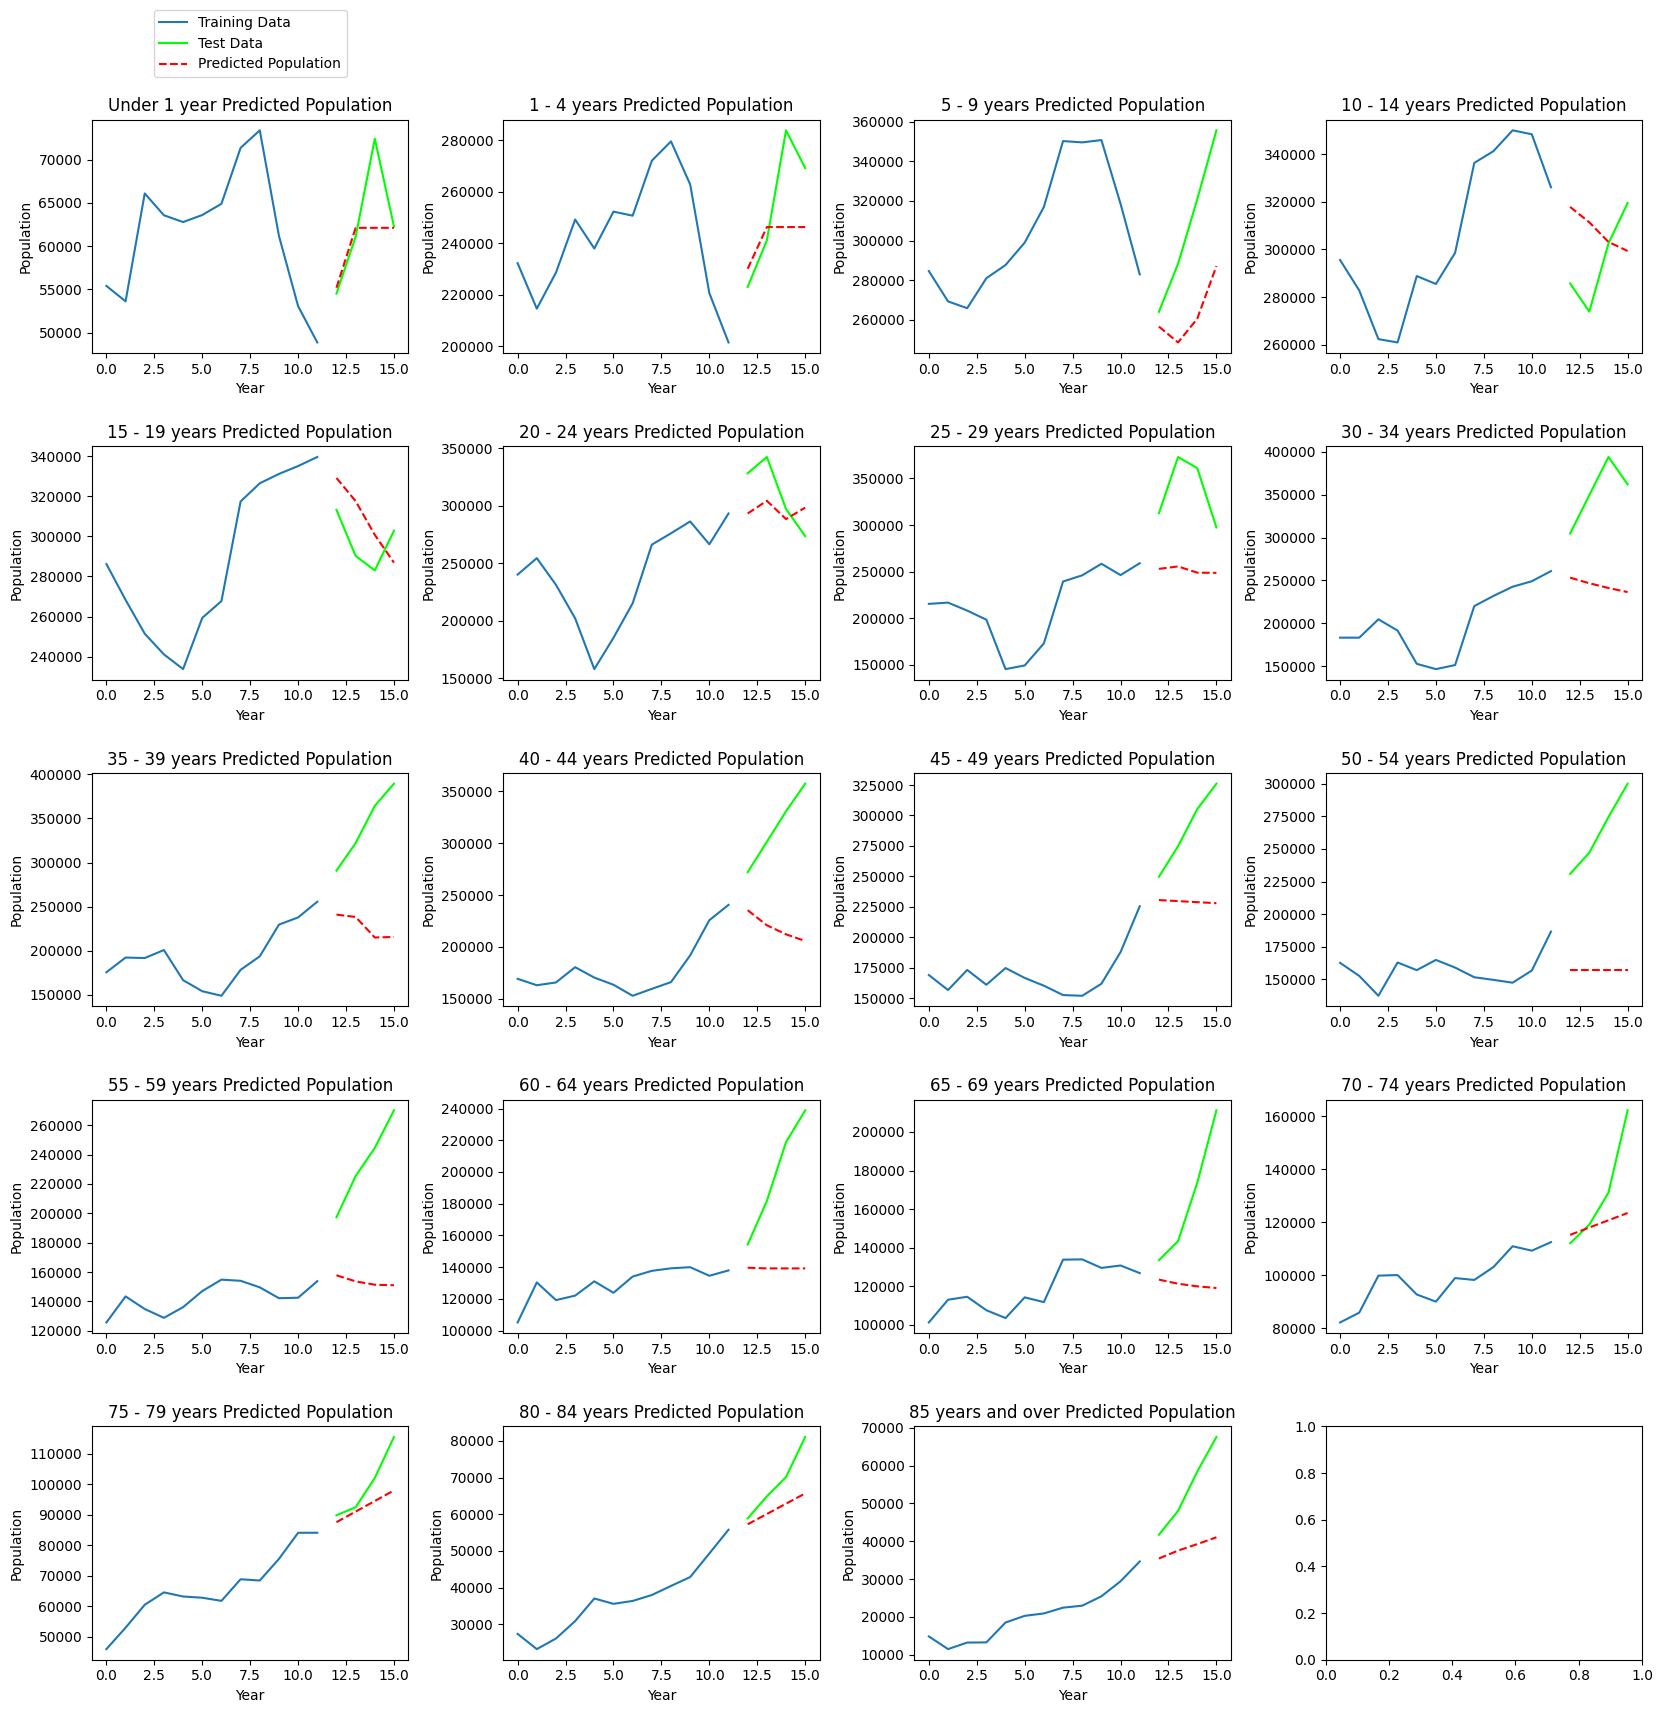

In [61]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ag, forecast, ax in zip(age_groups, forecasts, axes):
    y = train[ag]
    y_test = test[ag]
    
    ax.plot(train.index, y, label='Training Data')
    ax.plot(test.index, y_test, label='Test Data', color='lime')
    ax.plot(test.index, forecast, label=f'Predicted Population', color='red', linestyle='--')
    ax.set_title(f'{ag} Predicted Population')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    # ax.set_ylim(bottom=0)

axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

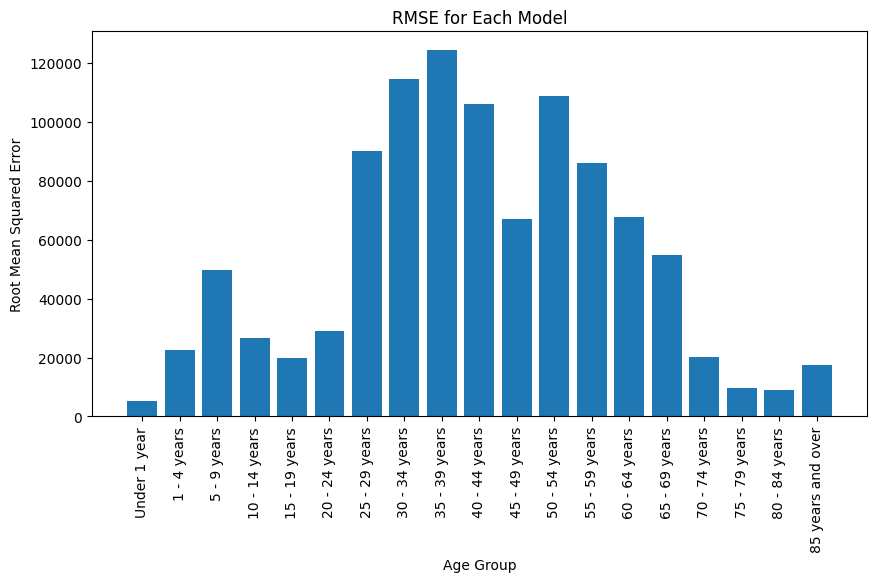

Average RMSE: 54080.9
Average RMSE for elderly populations: 22148.64


In [35]:
# Plotting each model's root mean squared error (RMSE)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), rmses)
plt.title('RMSE for Each Model')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_rmse = round(sum(rmses) / len(rmses), 2)
print('Average RMSE:', avg_rmse)

avg_rmse = round(sum(rmses[-5:]) / 5, 2)
print('Average RMSE for elderly populations:', avg_rmse)